In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors

In [2]:
model_mask_file = '/storage/shared/oceanparcels/input_data/NEMO16_CMCC/GLOB16L98_mesh_mask_atlantic.nc'

mask_ds = xr.open_dataset(model_mask_file, decode_times=False).load()
mask_lon = mask_ds['glamf'].values
mask_lat = mask_ds['gphif'].values
mask_land = mask_ds['tmask'].values[:,:,:,:]

In [3]:
home_folder = '/nethome/manra003/analysis/dispersion/simulations/'

ds3D=xr.open_zarr(home_folder+'Fwd_3D_Luderitz_117x117_Nov01-31_2017_0z_100days.zarr')
ds2D=xr.open_zarr(home_folder+'Fwd_2D_Luderitz_117x117_Nov01-31_2017_0z_100days.zarr')

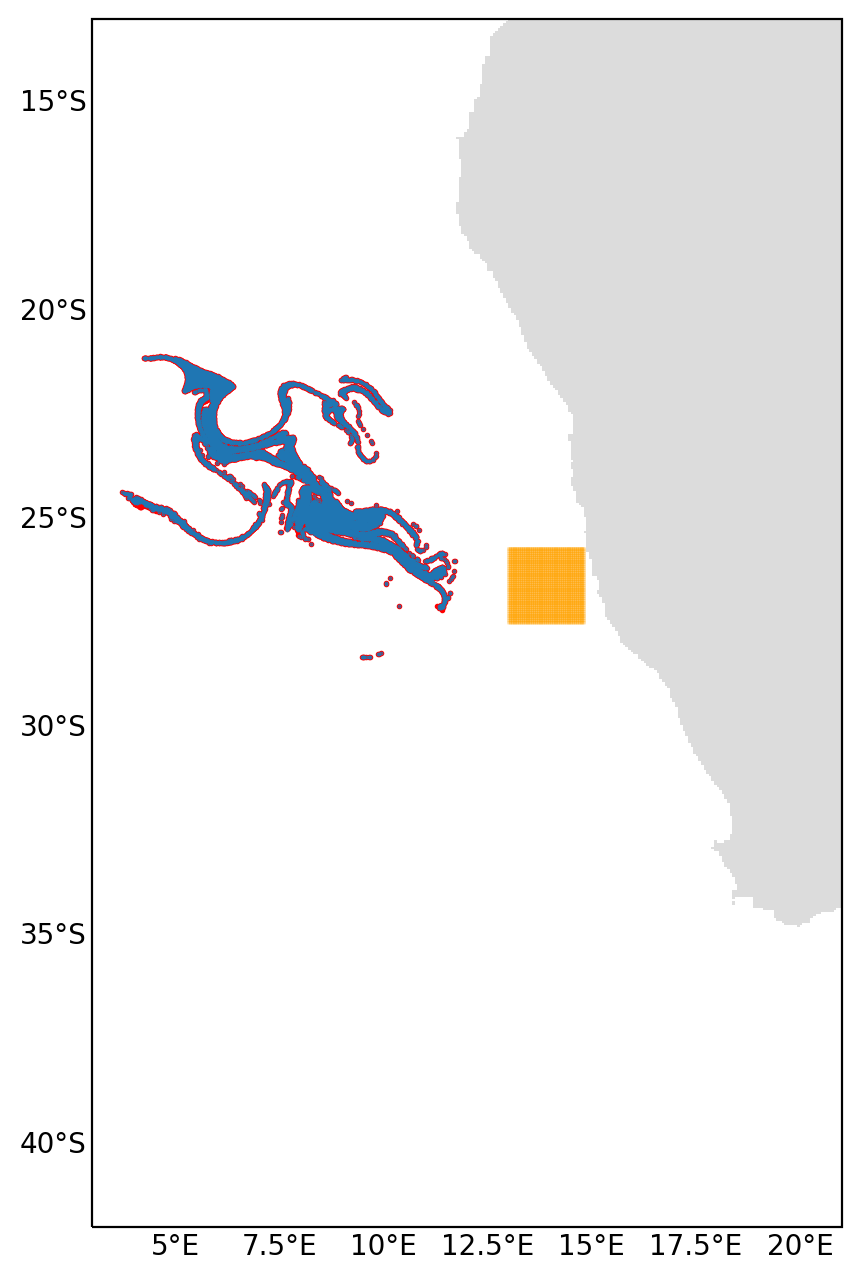

In [5]:
custom_size=10
fig = plt.figure(figsize=(12,8), dpi=200)
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

colormap = colors.ListedColormap(['gainsboro', 'white'])

# Near Amazon river- 4-5 month simulations
ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0, 0,1250:1750, 1500:], cmap=colormap)
ax.set_xlim(3,21)
ax.set_ylim(-42,-13)
# ax.set_xlim(10,16)
# ax.set_ylim(-30,-21)
ax.scatter(ds3D['lon'][:,0], ds3D['lat'][:,0], s=0.001, c='orange')
ax.scatter(ds3D['lon'][:,90], ds3D['lat'][:,90], s=1, c='red')
ax.scatter(ds2D['lon'][:,90], ds2D['lat'][:,90], s=0.1)

plt.show()

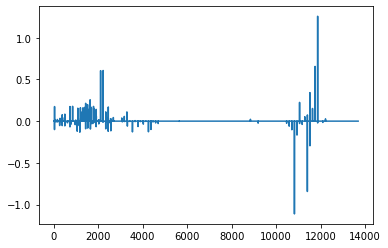

In [6]:
plt.plot(ds2D['lon'][:,90]-ds3D['lon'][:,90])


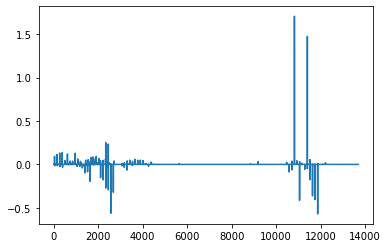

In [7]:
plt.plot(ds2D['lat'][:,90]-ds3D['lat'][:,90])


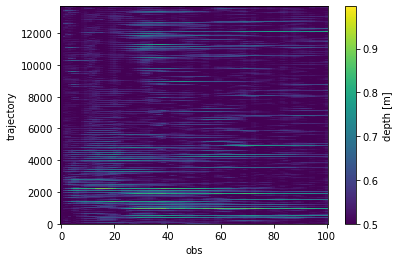

In [8]:
ds3D.z.plot()

In [10]:
np.min(ds3D.z.values)

0.5